In [1]:
import pandas as pd
import os

# Define the base path where the files are located
# Assuming the files are in the current directory for this example, adjust the path as needed
base_path = "."

# Define the ranges and file name patterns
method_ranges = [100, 200, 400, 800,  1600, 2000, 2400, 2800, 3200, 3600, 4000, 4400, 4800, 5200, 5600, 6000, 6400]
file_patterns = ["SS_{}methodPrune_test_0.5.csv", "SS_{}methodPrune_test_time_0.5.csv"]

# Initialize empty dataframes for stacking the data
df = pd.DataFrame()
df_time = pd.DataFrame()

# Loop over the method ranges and file patterns to read and stack the data
for method in method_ranges:
    file_path = os.path.join(base_path, file_patterns[0].format(method))
    if os.path.exists(file_path):
        temp_df = pd.read_csv(file_path)
        df = pd.concat([df, temp_df], ignore_index=True)
    
    time_file_path = os.path.join(base_path, file_patterns[1].format(method))
    if os.path.exists(time_file_path):
        temp_df_time = pd.read_csv(time_file_path)
        df_time = pd.concat([df_time, temp_df_time], ignore_index=True)

df.insert(loc=0, column='sample size', value=method_ranges)
df = df.drop(df_time.columns[1], axis=1)
df_time.insert(loc=0, column='sample size', value=method_ranges)
df_time = df_time.drop(df_time.columns[1], axis=1)
df, df_time
df.to_csv('mse_compare.csv')
df_time.to_csv('time_compare.csv')

In [2]:
df_data = df_time/df #time spent per unit MSE
df_data = df_data.drop(df_data.columns[-1], axis=1)
df_data.insert(loc=0, column='sample size', value=method_ranges)

findfont: Font family ['cmtt10'] not found. Falling back to DejaVu Sans.
findfont: Font family ['cmb10'] not found. Falling back to DejaVu Sans.
findfont: Font family ['cmss10'] not found. Falling back to DejaVu Sans.
findfont: Font family ['DejaVu Sans Display'] not found. Falling back to DejaVu Sans.


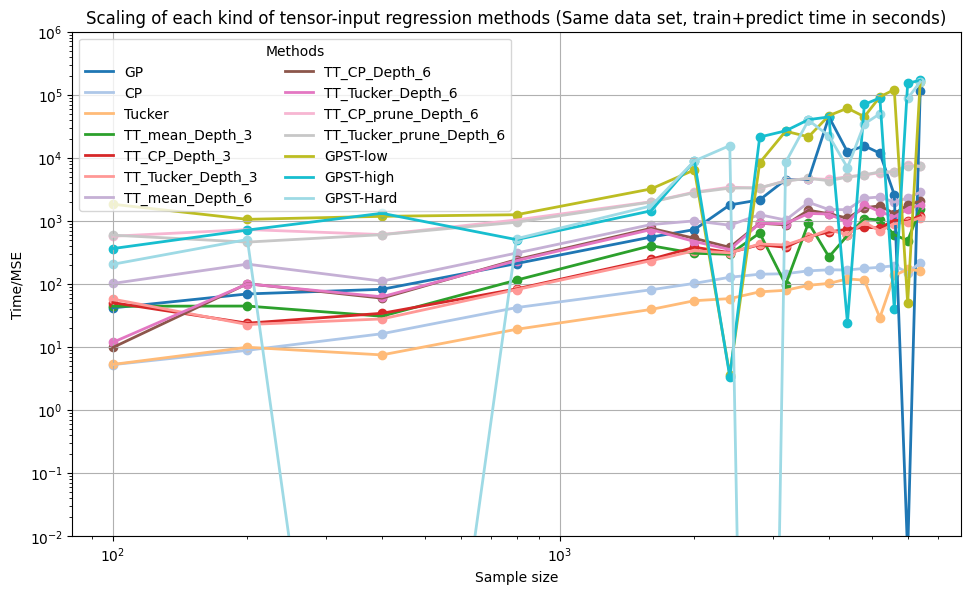

In [3]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# Assuming 'df' is your dataframe
# Example: df = pd.DataFrame(np.random.rand(10, 10))  # Sample dataframe with 10 columns

# Selecting specific columns: 1st, 3rd, 6th (Python uses 0-based indexing)
#selected_columns = df_data.iloc[:, [1, 3, 6]]
# List of column names you want to select
columns_to_select = ['GP', 'CP', 'Tucker', #'TT_mean_Depth_6',
                     #'TT_mean_Depth_0','TT_CP_Depth_0', 'TT_Tucker_Depth_0',
                     'TT_mean_Depth_3','TT_CP_Depth_3', 'TT_Tucker_Depth_3', 
                     'TT_mean_Depth_6','TT_CP_Depth_6', 'TT_Tucker_Depth_6', #'TT_mean_prune_Depth_6',
                     'TT_CP_prune_Depth_6','TT_Tucker_prune_Depth_6', 'GPST-low', 'GPST-high', 'GPST-Hard']

# Select the specified columns from df_time
selected_columns = df_data[columns_to_select]


# Number of selected columns
n_selected = len(selected_columns.columns)

# Generate a list of colors from a colormap
# Here, 'Set1' is used for discrete colors, but you can choose others like 'tab10', 'Set3', etc.
colors = plt.cm.tab20(np.linspace(0, 1, n_selected))

plt.figure(figsize=(10, 6))  # Set the figure size

for i, column in enumerate(selected_columns.columns):
    plt.plot(method_ranges, selected_columns[column], label=column, color=colors[i], linewidth=2)
    plt.scatter(method_ranges, selected_columns[column], color=colors[i])

plt.title('Scaling of each kind of tensor-input regression methods (Same data set, train+predict time in seconds)')  # Title
plt.xlabel('Sample size')  # X-axis label
plt.ylabel('Time/MSE')  # Y-axis label
plt.legend(title="Methods",ncol=2)  # Legend with title
plt.grid(True)  # Enable grid
plt.tight_layout()  # Adjust layout
plt.xscale('log')
plt.yscale('log')
plt.ylim(0.01,10**6)
plt.show()  # Display the plot


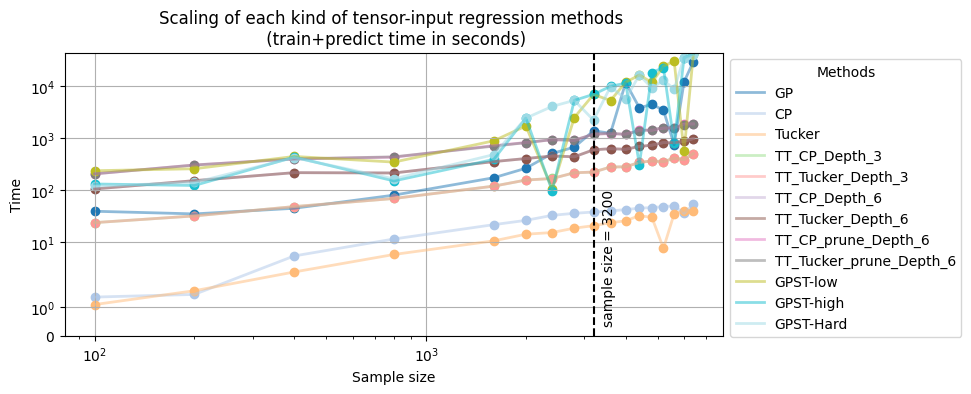

In [4]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# Assuming 'df' is your dataframe
# Example: df = pd.DataFrame(np.random.rand(10, 10))  # Sample dataframe with 10 columns

# Selecting specific columns: 1st, 3rd, 6th (Python uses 0-based indexing)
#selected_columns = df_data.iloc[:, [1, 3, 6]]
# List of column names you want to select
columns_to_select = ['GP', 'CP', 'Tucker', #'TT_mean_Depth_6',
                     #'TT_mean_Depth_0','TT_CP_Depth_0', 'TT_Tucker_Depth_0',
                     'TT_CP_Depth_3', 'TT_Tucker_Depth_3', 
                     'TT_CP_Depth_6', 'TT_Tucker_Depth_6', #'TT_mean_prune_Depth_6',
                     'TT_CP_prune_Depth_6','TT_Tucker_prune_Depth_6', 'GPST-low', 'GPST-high', 'GPST-Hard']

# Select the specified columns from df_time
selected_columns = df_time[columns_to_select]


# Number of selected columns
n_selected = len(selected_columns.columns)

# Generate a list of colors from a colormap
# Here, 'Set1' is used for discrete colors, but you can choose others like 'tab10', 'Set3', etc.
colors = plt.cm.tab20(np.linspace(0, 1, n_selected))

plt.figure(figsize=(10, 4))  # Set the figure size

for i, column in enumerate(selected_columns.columns):
    plt.plot(method_ranges, selected_columns[column], label=column, color=colors[i], linewidth=2,alpha=.5)
    plt.scatter(method_ranges, selected_columns[column], color=colors[i])

plt.title('Scaling of each kind of tensor-input regression methods \n (train+predict time in seconds)')  # Title
plt.xlabel('Sample size')  # X-axis label
plt.ylabel('Time')  # Y-axis label
plt.legend(title="Methods",ncol=1,loc='upper left', bbox_to_anchor=(1, 1))  # Legend with title
plt.subplots_adjust(right=0.75)  # Adjust this value as needed for your plot

plt.grid(True)  # Enable grid
plt.tight_layout()  # Adjust layout
plt.xscale('log')
plt.yscale('symlog')
plt.ylim(0,45000)
# Draw a vertical black dashed line at x=3200
plt.axvline(x=3200, color='black', linestyle='--')

# Add a rotated text label at the center right next to the line
plt.text(3400, 5, 'sample size = 3200', rotation=90, verticalalignment='center')

plt.show()  # Display the plot


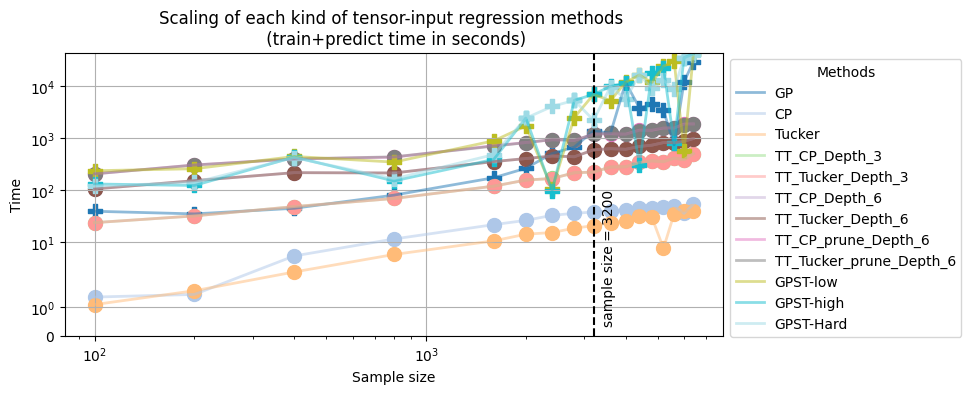

In [5]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# Assuming 'df_time' is your dataframe with the specified columns

# List of column names you want to select
columns_to_select = ['GP', 'CP', 'Tucker', 
                     'TT_CP_Depth_3', 'TT_Tucker_Depth_3', 
                     'TT_CP_Depth_6', 'TT_Tucker_Depth_6',
                     'TT_CP_prune_Depth_6','TT_Tucker_prune_Depth_6', 
                     'GPST-low', 'GPST-high', 'GPST-Hard']

# Select the specified columns from df_time
selected_columns = df_time[columns_to_select]

# Number of selected columns
n_selected = len(selected_columns.columns)

# Generate a list of colors from a colormap
colors = plt.cm.tab20(np.linspace(0, 1, n_selected))

plt.figure(figsize=(10, 4))  # Set the figure size

# Define method markers
method_markers = {
    'GP': 'P',  # Pentagon for GP-based methods
    'CP': 'o',  # Circle for CP
    'Tucker': 'o',  # Circle for Tucker
    'TT': '^',  # Triangle up for TT-based methods
    'GPST': 'P'  # Pentagon for GPST methods
}

for i, column in enumerate(selected_columns.columns):
    # Determine the marker for each method
    marker = 'o'  # Default marker
    for key in method_markers:
        if key in column:
            marker = method_markers[key]
            break
    
    plt.plot(method_ranges, selected_columns[column], label=column, color=colors[i], linewidth=2, alpha=0.5)
    plt.scatter(method_ranges, selected_columns[column], color=colors[i], marker=marker, s=100)  # s is the marker size

plt.title('Scaling of each kind of tensor-input regression methods \n (train+predict time in seconds)')  # Title
plt.xlabel('Sample size')  # X-axis label
plt.ylabel('Time')  # Y-axis label
plt.legend(title="Methods", ncol=1, loc='upper left', bbox_to_anchor=(1, 1))  # Legend with title
plt.subplots_adjust(right=0.75)  # Adjust layout for the legend

plt.grid(True)  # Enable grid
plt.tight_layout()  # Adjust layout
plt.xscale('log')
plt.yscale('symlog')
plt.ylim(0, 45000)

# Draw a vertical black dashed line at x=3200
plt.axvline(x=3200, color='black', linestyle='--')

# Add a rotated text label at the center right next to the line
plt.text(3400, 5, 'sample size = 3200', rotation=90, verticalalignment='center')

plt.show()  # Display the plot


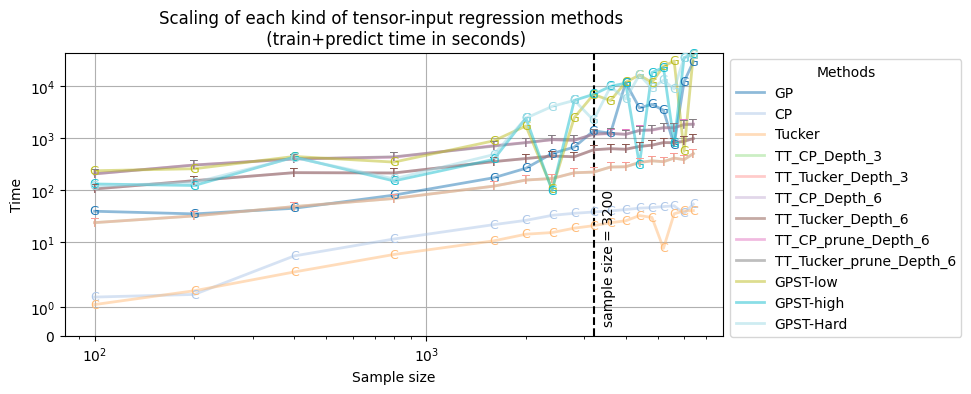

In [6]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# Assuming 'df_time' is your dataframe with the specified columns

# List of column names you want to select
columns_to_select = ['GP', 'CP', 'Tucker', 
                     'TT_CP_Depth_3', 'TT_Tucker_Depth_3', 
                     'TT_CP_Depth_6', 'TT_Tucker_Depth_6',
                     'TT_CP_prune_Depth_6','TT_Tucker_prune_Depth_6', 
                     'GPST-low', 'GPST-high', 'GPST-Hard']

# Select the specified columns from df_time
selected_columns = df_time[columns_to_select]

# Number of selected columns
n_selected = len(selected_columns.columns)

# Generate a list of colors from a colormap
colors = plt.cm.tab20(np.linspace(0, 1, n_selected))

plt.figure(figsize=(10, 4))  # Set the figure size

# Define method letters
method_letters = {
    'GP': 'G',  # 'G' for GP-based methods
    'TT': 'T',  # 'T' for TT-based methods
    'CP': 'C',  # 'C' for CP methods
    'Tucker': 'C'  # 'C' for Tucker methods
}

for i, column in enumerate(selected_columns.columns):
    # Determine the letter for each method
    letter = 'C'  # Default letter for CP and Tucker
    for key in method_letters:
        if key in column:
            letter = method_letters[key]
            break
    
    # Plot line
    plt.plot(method_ranges, selected_columns[column], label=column, color=colors[i], linewidth=2, alpha=0.5)
    
    # Place letters instead of markers
    for x, y in zip(method_ranges, selected_columns[column]):
        plt.text(x, y, letter, color=colors[i], fontsize=9, ha='center', va='center')

plt.title('Scaling of each kind of tensor-input regression methods \n (train+predict time in seconds)')  # Title
plt.xlabel('Sample size')  # X-axis label
plt.ylabel('Time')  # Y-axis label
plt.legend(title="Methods", ncol=1, loc='upper left', bbox_to_anchor=(1, 1))  # Legend with title
plt.subplots_adjust(right=0.75)  # Adjust layout for the legend

plt.grid(True)  # Enable grid
plt.tight_layout()  # Adjust layout
plt.xscale('log')
plt.yscale('symlog')
plt.ylim(0, 45000)

# Draw a vertical black dashed line at x=3200
plt.axvline(x=3200, color='black', linestyle='--')

# Add a rotated text label at the center right next to the line
plt.text(3400, 5, 'sample size = 3200', rotation=90, verticalalignment='center')

plt.show()  # Display the plot
